In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

In [26]:
df=pd.read_csv('co2_mm_mlo.csv')
df.describe()

,year,month,decimal_date,average,interpolated
count,729.000000,729.000000,729.000000,722.000000,729.000000
mean,1988.041152,6.506173,1988.541667,354.073587,353.787229
std,17.549724,3.445459,17.549039,27.506545,27.547500
min,1958.000000,1.000000,1958.208000,313.200000,312.660000
25%,1973.000000,4.000000,1973.375000,328.927500,328.570000
50%,1988.000000,7.000000,1988.542000,351.630000,351.410000
75%,2003.000000,9.000000,2003.708000,376.122500,375.990000
max,2018.000000,12.000000,2018.875000,411.240000,411.240000


In [27]:
df['date']=pd.to_datetime({"year":df.year, "month":df.month, "day":1})
df['date']=pd.to_datetime(dict(year=df.year, month=df.month, day=1))
df.set_index('date', inplace=True)
df.index.freq='MS'
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


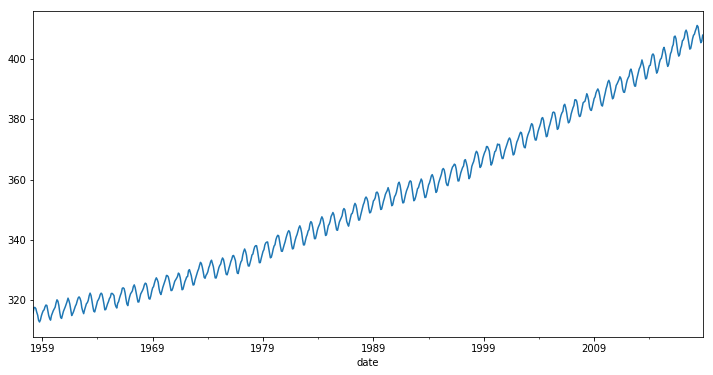

In [29]:
df.interpolated.plot(figsize=(12,6));

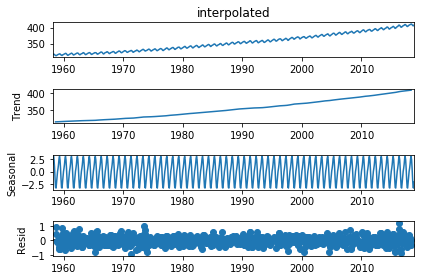

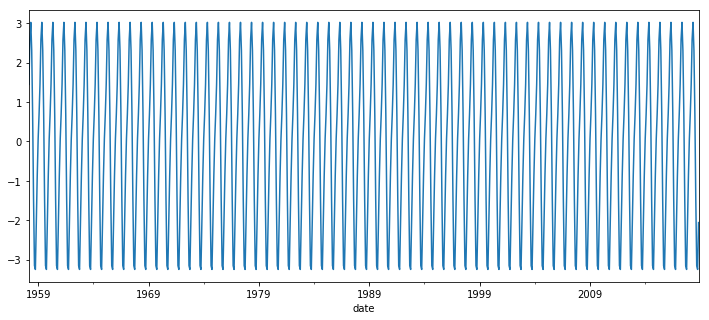

In [41]:
result=seasonal_decompose(df.interpolated, model='add')
result.plot()
plt.figure(figsize=(12,5))
result.seasonal.plot();

In [42]:
stepwise_fit=auto_arima(df.interpolated
                        , max_order=6
                        , d=1, D=1, m=12
                        , max_p=2, max_q=3, max_P=1, max_Q=1
                        , stepwise=False
                        , trace=True
                       )

Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=848.375, BIC=857.522, Time=0.201 seconds
Fit ARIMA(0,1,0)x(0,1,1,12) [intercept=True]; AIC=460.155, BIC=473.876, Time=1.388 seconds
Fit ARIMA(0,1,0)x(1,1,0,12) [intercept=True]; AIC=671.928, BIC=685.649, Time=0.950 seconds
Fit ARIMA(0,1,0)x(1,1,1,12) [intercept=True]; AIC=461.808, BIC=480.103, Time=2.227 seconds
Fit ARIMA(0,1,1)x(0,1,0,12) [intercept=True]; AIC=756.017, BIC=769.738, Time=0.282 seconds


c:\users\tsar\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=375.925, BIC=394.220, Time=5.225 seconds
Fit ARIMA(0,1,1)x(1,1,0,12) [intercept=True]; AIC=574.179, BIC=592.473, Time=1.377 seconds
Fit ARIMA(0,1,1)x(1,1,1,12) [intercept=True]; AIC=377.925, BIC=400.793, Time=3.035 seconds
Fit ARIMA(0,1,2)x(0,1,0,12) [intercept=True]; AIC=755.790, BIC=774.084, Time=0.470 seconds
Fit ARIMA(0,1,2)x(0,1,1,12) [intercept=True]; AIC=374.403, BIC=397.271, Time=4.917 seconds
Fit ARIMA(0,1,2)x(1,1,0,12) [intercept=True]; AIC=574.577, BIC=597.445, Time=1.643 seconds
Fit ARIMA(0,1,2)x(1,1,1,12) [intercept=True]; AIC=376.402, BIC=403.845, Time=4.661 seconds
Fit ARIMA(0,1,3)x(0,1,0,12) [intercept=True]; AIC=753.313, BIC=776.182, Time=0.654 seconds
Fit ARIMA(0,1,3)x(0,1,1,12) [intercept=True]; AIC=371.228, BIC=398.670, Time=5.916 seconds
Fit ARIMA(0,1,3)x(1,1,0,12) [intercept=True]; AIC=573.436, BIC=600.878, Time=1.910 seconds


c:\users\tsar\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(0,1,3)x(1,1,1,12) [intercept=True]; AIC=373.211, BIC=405.227, Time=8.358 seconds
Fit ARIMA(1,1,0)x(0,1,0,12) [intercept=True]; AIC=773.013, BIC=786.734, Time=0.221 seconds
Fit ARIMA(1,1,0)x(0,1,1,12) [intercept=True]; AIC=393.023, BIC=411.317, Time=2.288 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=591.991, BIC=610.286, Time=1.313 seconds
Fit ARIMA(1,1,0)x(1,1,1,12) [intercept=True]; AIC=394.963, BIC=417.831, Time=3.411 seconds
Fit ARIMA(1,1,1)x(0,1,0,12) [intercept=True]; AIC=754.948, BIC=773.243, Time=0.605 seconds
Fit ARIMA(1,1,1)x(0,1,1,12) [intercept=True]; AIC=372.572, BIC=395.441, Time=4.248 seconds
Fit ARIMA(1,1,1)x(1,1,0,12) [intercept=True]; AIC=574.087, BIC=596.955, Time=4.710 seconds


c:\users\tsar\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(1,1,1)x(1,1,1,12) [intercept=True]; AIC=374.570, BIC=402.012, Time=6.664 seconds


c:\users\tsar\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(1,1,2)x(0,1,0,12) [intercept=True]; AIC=721.260, BIC=744.128, Time=2.540 seconds


c:\users\tsar\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(1,1,2)x(0,1,1,12) [intercept=True]; AIC=372.861, BIC=400.304, Time=6.988 seconds
Fit ARIMA(1,1,2)x(1,1,0,12) [intercept=True]; AIC=575.640, BIC=603.082, Time=3.509 seconds
Fit ARIMA(1,1,2)x(1,1,1,12) [intercept=True]; AIC=374.836, BIC=406.852, Time=8.248 seconds
Fit ARIMA(1,1,3)x(0,1,0,12) [intercept=True]; AIC=755.221, BIC=782.663, Time=1.193 seconds


c:\users\tsar\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(1,1,3)x(0,1,1,12) [intercept=True]; AIC=373.528, BIC=405.543, Time=8.352 seconds
Fit ARIMA(1,1,3)x(1,1,0,12) [intercept=True]; AIC=575.318, BIC=607.333, Time=2.587 seconds


KeyboardInterrupt: 

Eyeballing the above

In [43]:
train=df.iloc[:717]
test=df.iloc[717:]

In [44]:
#ARIMA(1,1,1)x(0,1,1,12)
model=SARIMAX(train.interpolated, order=(1,1,1), seasonal_order=(0,1,1,12))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -180.357
Date:                            Tue, 26 May 2020   AIC                            368.714
Time:                                    17:45:44   BIC                            386.941
Sample:                                03-01-1958   HQIC                           375.758
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2004      0.082      2.444      0.015       0.040       0.361
ma.L1         -0.5631      0.071     -7.927      0.000      -0.702      -0.424
ma.S.L12      -0.8636      0.022    -38.962      0.000      -0.907      -0.820
sigma2         0.0955      0.005     20.424      0.000       0.086       0.105
===================================================================================
Ljung-Box (Q):                       42.84   Jarque-Bera (JB):                 4.95
Prob(Q):                              0.35   Prob(JB):                         0.08
Heteroskedasticity (H):               1.13   Skew:                             0.02
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
start=len(train)
end=len(train)+len(test)-1
predictions=results.predict(start=start, end=end, dynamic=False).rename('SARIMA(1,1,1)x(0,1,1,12) Predictions')
predictions.head()

2017-12-01    406.607287
2018-01-01    407.824771
2018-02-01    408.573817
2018-03-01    409.482181
2018-04-01    411.047603
Freq: MS, Name: SARIMA(1,1,1)x(0,1,1,12) Predictions, dtype: float64

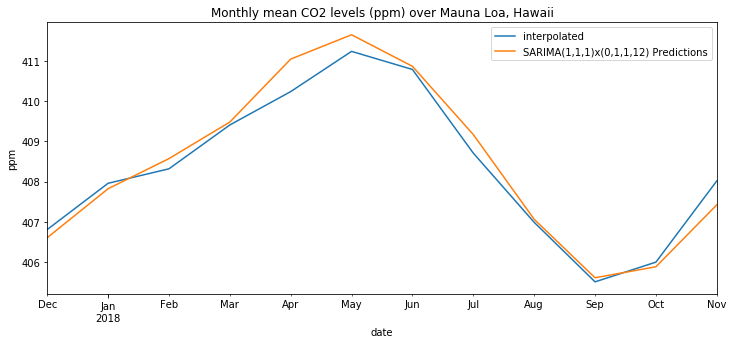

In [49]:
title="Monthly mean CO2 levels (ppm) over Mauna Loa, Hawaii"
ylabel="ppm"
xlabel="date"

ax = test.interpolated.plot(legend=True, figsize=(12,5), title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [51]:
from sklearn.metrics import mean_squared_error
err = mean_squared_error(test.interpolated, predictions)
err

0.1295752284391285

In [52]:
from statsmodels.tools.eval_measures import rmse
rmse_err = rmse(test.interpolated, predictions)
rmse_err

0.3599655934101598

In [55]:
#ARIMA(1,1,1)x(0,1,1,12)
model=SARIMAX(df.interpolated, order=(1,1,1), seasonal_order=(0,1,1,12))
results=model.fit()
results.summary()
fcast=results.predict(len(df), len(df)+119).rename('SARIMA Forecast')

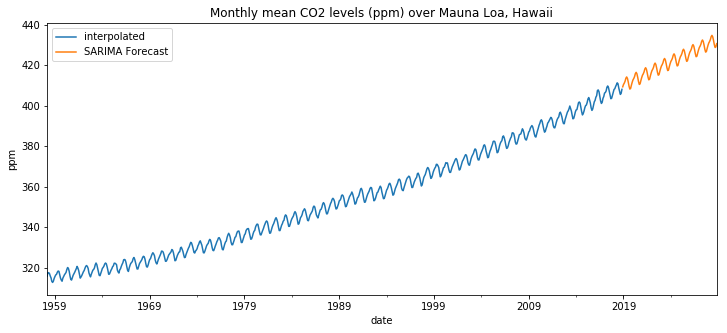

In [56]:
title="Monthly mean CO2 levels (ppm) over Mauna Loa, Hawaii"
ylabel="ppm"
xlabel="date"

ax = df.interpolated.plot(legend=True, figsize=(12,5), title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);